In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
df = pd.read_csv('data.csv')
df

,count,channel_1,channel_2,channel_3,channel_4,acc_x,acc_y,acc_z,resistance_1,resistance_2,resistance_3,resistance_4,resistance_5,timestamp,marker,class
0,101.0,-1009.670141,-393.942362,-930.014012,-308.921346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.704024e+09,0.0,eyes_blink
1,101.0,-999.179721,-378.260961,-911.722161,-313.925332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.704024e+09,0.0,eyes_blink
2,102.0,-985.618844,-377.640138,-923.992773,-321.749203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.704024e+09,0.0,eyes_blink
3,102.0,-997.747340,-395.423362,-938.873835,-323.286302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.704024e+09,0.0,eyes_blink
4,103.0,-999.497613,-407.675274,-941.001838,-320.163485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.704024e+09,0.0,eyes_blink
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427046,163.0,-698.319730,92.964563,-5.252689,-57.966579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.704118e+09,0.0,physical_motor_activation
427047,164.0,-735.782307,-2.036376,-62.196406,-125.920562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.704118e+09,0.0,physical_motor_activation
427048,164.0,-759.089364,-58.763178,-92.340000,-159.751697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.704118e+09,0.0,physical_motor_activation
427049,165.0,-717.879406,36.473374,-33.522593,-90.739323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.704118e+09,0.0,physical_motor_activation


In [3]:
columns_to_remove = ['count', 'acc_x','acc_y', 'acc_z', 'resistance_1', 'resistance_2', 'resistance_3', 'resistance_4', 'resistance_5', 'timestamp', 'marker']
df = df.drop(columns_to_remove, axis=1)
df

,channel_1,channel_2,channel_3,channel_4,class
0,-1009.670141,-393.942362,-930.014012,-308.921346,eyes_blink
1,-999.179721,-378.260961,-911.722161,-313.925332,eyes_blink
2,-985.618844,-377.640138,-923.992773,-321.749203,eyes_blink
3,-997.747340,-395.423362,-938.873835,-323.286302,eyes_blink
4,-999.497613,-407.675274,-941.001838,-320.163485,eyes_blink
...,...,...,...,...,...
427046,-698.319730,92.964563,-5.252689,-57.966579,physical_motor_activation
427047,-735.782307,-2.036376,-62.196406,-125.920562,physical_motor_activation
427048,-759.089364,-58.763178,-92.340000,-159.751697,physical_motor_activation
427049,-717.879406,36.473374,-33.522593,-90.739323,physical_motor_activation


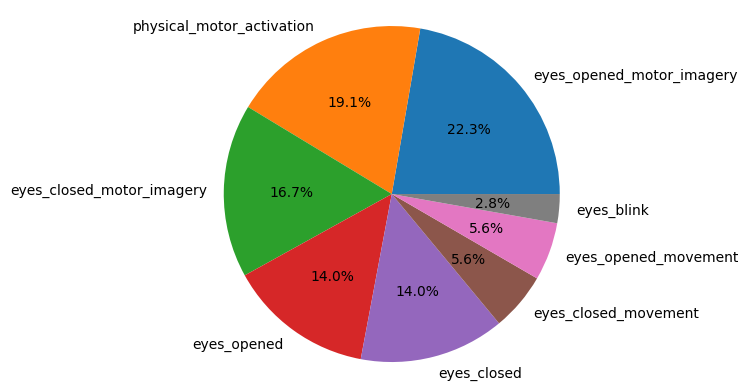

In [4]:
# Class distribution
class_counts = df['class'].value_counts()

fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

In [5]:
# Selecting only three classes eyes opened, eyes closed & eyes opened motor imagery
df = df[df['class'].isin(['eyes_opened_motor_imagery',
                       'eyes_opened', 'eyes_closed'])]

In [6]:
# Converting eyes opened and eyes closed to eyes static
df['class'] = np.where(df['class'].isin(['eyes_opened', 'eyes_closed']),
                       'eyes_static', df['class'])

C:\Users\akash\AppData\Local\Temp\ipykernel_15468\1707830725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = np.where(df['class'].isin(['eyes_opened', 'eyes_closed']),


In [7]:
df['target'] = np.where(df['class'] == 'eyes_static', 0, 1)

C:\Users\akash\AppData\Local\Temp\ipykernel_15468\1066407113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = np.where(df['class'] == 'eyes_static', 0, 1)


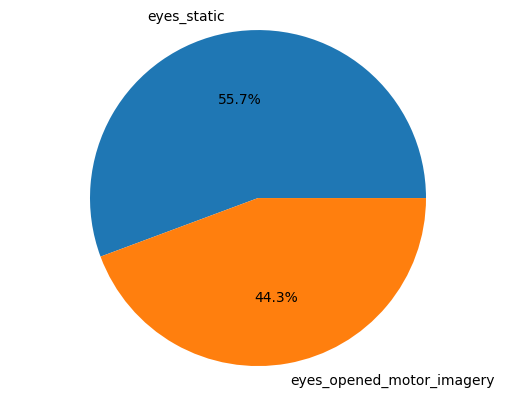

In [8]:
# Class distribution after choosing class
class_counts = df['class'].value_counts()

fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
# Splitting X and y
X = df[['channel_1', 'channel_2', 'channel_3', 'channel_4']]
y = df['target']

### EdgeImpulse

In [10]:
# Import
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Conv1D, Conv2D, Flatten, Reshape, MaxPooling1D, MaxPooling2D, AveragePooling2D, BatchNormalization, Permute, ReLU, Softmax
from tensorflow.keras.optimizers.legacy import Adam

In [11]:
EPOCHS = 30
LEARNING_RATE = 0.0005
# If True, non-deterministic functions (e.g. shuffling batches) are not used.
# This is False by default.
ENSURE_DETERMINISM = False
# this controls the batch size, or you can manipulate the tf.data.Dataset objects yourself
BATCH_SIZE = 32

In [12]:
# if not ENSURE_DETERMINISM:
#     train_dataset = train_dataset.shuffle(buffer_size=BATCH_SIZE*4)
# train_dataset=train_dataset.batch(BATCH_SIZE, drop_remainder=False)
# validation_dataset = validation_dataset.batch(BATCH_SIZE, drop_remainder=False)

NameError: name 'train_dataset' is not defined

In [14]:
classes = 2

In [13]:
# model architecture
model = Sequential()
model.add(Dense(20, activation='relu',
    activity_regularizer=tf.keras.regularizers.l1(0.00001)))
model.add(Dense(10, activation='relu',
    activity_regularizer=tf.keras.regularizers.l1(0.00001)))
model.add(Dense(classes, name='y_pred', activation='softmax'))

NameError: name 'classes' is not defined

In [ ]:
callbacks = []

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("best_model.keras",
            monitor='val_loss',
            save_best_only=True, mode='auto',
            # It's important to save and load the whole model and not just the weights because,
            # if we do any fine tuning during transfer learning, the fine tuned model has a
            # slightly different data structure.
            save_weights_only=False,
            verbose=0)

In [ ]:
callbacks.append(model_checkpoint_callback)

In [ ]:
# Batch logger
class BatchLoggerCallback(tf.keras.callbacks.Callback):
    def __init__(self, batch_size, train_sample_count, epochs, interval_s = 10, ensure_determinism=False):
        # train_sample_count could be smaller than the batch size, so make sure total_batches is atleast
        # 1 to avoid a 'divide by zero' exception in the 'on_train_batch_end' callback.
        self.total_batches = max(1, int(train_sample_count / batch_size))
        self.last_log_time = time.time()
        self.epochs = epochs
        self.interval_s = interval_s
        print(f'Using batch size: {batch_size}', flush=True)

    # Within each epoch, print the time every 10 seconds
    def on_train_batch_end(self, batch, logs=None):
        current_time = time.time()
        if self.last_log_time + self.interval_s < current_time:
            print('Epoch {0}% done'.format(int(100 / self.total_batches * batch)), flush=True)
            self.last_log_time = current_time

    # Reset the time the start of every epoch
    def on_epoch_end(self, epoch, logs=one):
        self.last_log_time = time.time()

In [ ]:
# this controls the learning rate
opt = Adam(learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999)
callbacks.append(BatchLoggerCallback(BATCH_SIZE, train_sample_count, epochs=EPOCHS, ensure_determinism=ENSURE_DETERMINISM))

In [ ]:
# train the neural network
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset, verbose=2, callbacks=callbacks)

# Use this flag to disable per-channel quantization for a model.
# This can reduce RAM usage for convolutional models, but may have
# an impact on accuracy.
disable_per_channel_quantization = False